## Load Libraries

In [124]:
#Uploading relevant libraries
!pip install --upgrade pip
!pip install pingouin
!pip install plotly
!pip install seaborn --upgrade
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set()
from IPython.display import IFrame
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import spearmanr
import re
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import pingouin as pg
pd.set_option('display.max_columns', None)

allegory = pd.read_excel('/Users/nicolerodriguezq/Desktop/Data Science /Capstone/Data/allegory.xlsx', index_col =0)
wwf = pd.read_excel('/Users/nicolerodriguezq/Desktop/Data Science /Capstone/Data/wwf.xlsx', index_col =0)

## About this notebook

This notebook contains two datasets which are part of the narrative and biodiversity loss study. 


Both notebooks contain the exact same questions, with the following surveys:

- The Nature Relatedness Scale, to measure people's 
- The PANAS survey, which focuses on the emotional responses, which in this case were drawn/ thought out from the videos they watched. 
- A survey on the narative and how the videos impacted the participants. 

## Cleaning the Datasets 

In [125]:
#looking at sample of data
allegory.head(2)

,Start time,Completion time,Email,Name,Last modified time,What is your age?,Gender. How do you Identify?,Please indicate which category best represents your highest educational qualification.,"\t\t\t \t\t\t\t \t\t\t\t\t1. I enjoy being outdoors, even in unpleasant weather. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t2. Some species are just meant to die out or become extinct. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t3. Humans have the right to use natural resources any way we want. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,"\t\t\t \t\t\t\t \t\t\t\t\t4. My ideal vacation spot would be a remote, wilderness area. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t5. I always think about how my actions affect the environment. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t6. I enjoy digging in the earth and getting dirt on my hands. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t7. My connection to nature and the environment is a part of my spirituality \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t8. I am very aware of environmental issues. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t9. I take notice of wildlife wherever I am.,\t\t\t \t\t\t\t \t\t\t\t\t10. I don’t often go out in nature. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t11. Nothing I do will change problems in other places on the planet. \t\t\t\t \t\t\t \t\t,"\t\t\t \t\t\t\t \t\t\t\t\t12. I am not separate from nature, but a part of nature. \t\t\t\t \t\t\t \t\t","\t\t\t \t\t\t\t \t\t\t\t\t13. The thought of being deep in the woods, away from civilization, is frightening. \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t14. My feelings about nature do not affect how I live my life. \t\t\t\t \t\t\t \t\t,"\t\t\t \t\t\t\t \t\t\t\t\t15. Animals, birds and plants should have fewer rights than humans. \t\t\t\t \t\t\t \t\t","\t\t\t \t\t\t\t \t\t\t\t\t16. Even in the middle of the city, I notice nature around me. \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t17. My relationship to nature is an important part of who I am. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t18. Conservation is unnecessary because nature is strong enough to recover from any human impact. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t19. The state of non-human species is an indicator of the future for humans \t\t\t\t \t\t\t \t\t,20. I think a lot about the suffering of animals. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t21. I feel very connected to all living things and the earth. \t\t\t\t \t\t\t \t\t,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,How completely do you feel you understood the short film?,How much effort do you feel you had to put into understanding the short film?,Have you seen short films similar to this one?,Do you feel you understood what the film was trying to communicate?,Were you interested in the short film?,Did the film hold your attention throughout?,Do you like how the short film was narrated?,The short film felt emotionally impactful,I believe immediate action is necessary on the topic addressed.,The short film made me more concerned about the state of the natural world.,I found myself emotionally affected by the story and/or visuals.,The film made me feel a personal sense of urgency about environmental issues.,"After finishing this short film, I wanted to share it with other people.",Would you be interested in taking part in a short interview to discuss more about the film?
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2025-05-22 14:05:29,2025-05-22 14:25:48,anonymous,NaN,NaN,18-24,Woman,Bachelors,5. Agree Strongly,1. Disagree strongly,1. Disagree strongly,2. Disagree a little,4. Agree a little,1. Disagree strongly,5. Agree Strongly,5. Agree Strongly,5. Agree Strongly,1. Disagree strongly,1. Disagree strongly,5. Agree Strongly,2. Dis

In [126]:
wwf.head(2)

,Start time,Completion time,Email,Name,Last modified time,What is your age?,Gender. How do you Identify?,Please indicate which category best represents your highest educational qualification.,"\t\t\t \t\t\t\t \t\t\t\t\t1. I enjoy being outdoors, even in unpleasant weather. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t2. Some species are just meant to die out or become extinct. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t3. Humans have the right to use natural resources any way we want. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,"\t\t\t \t\t\t\t \t\t\t\t\t4. My ideal vacation spot would be a remote, wilderness area. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t5. I always think about how my actions affect the environment. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t6. I enjoy digging in the earth and getting dirt on my hands. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t7. My connection to nature and the environment is a part of my spirituality \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t8. I am very aware of environmental issues. \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t9. I take notice of wildlife wherever I am.,\t\t\t \t\t\t\t \t\t\t\t\t10. I don’t often go out in nature. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t11. Nothing I do will change problems in other places on the planet. \t\t\t\t \t\t\t \t\t,"\t\t\t \t\t\t\t \t\t\t\t\t12. I am not separate from nature, but a part of nature. \t\t\t\t \t\t\t \t\t","\t\t\t \t\t\t\t \t\t\t\t\t13. The thought of being deep in the woods, away from civilization, is frightening. \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t14. My feelings about nature do not affect how I live my life. \t\t\t\t \t\t\t \t\t,"\t\t\t \t\t\t\t \t\t\t\t\t15. Animals, birds and plants should have fewer rights than humans. \t\t\t\t \t\t\t \t\t","\t\t\t \t\t\t\t \t\t\t\t\t16. Even in the middle of the city, I notice nature around me. \t\t\t\t \t\t\t \t\t",\t\t\t \t\t\t\t \t\t\t\t\t17. My relationship to nature is an important part of who I am. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t18. Conservation is unnecessary because nature is strong enough to recover from any human impact. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t19. The state of non-human species is an indicator of the future for humans \t\t\t\t \t\t\t \t\t,20. I think a lot about the suffering of animals. \t\t\t\t \t\t\t \t\t,\t\t\t \t\t\t\t \t\t\t\t\t21. I feel very connected to all living things and the earth. \t\t\t\t \t\t\t \t\t,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,How completely do you feel you understood the short film?,How much effort do you feel you had to put into understanding the short film?,Have you seen short films similar to this one?,Do you feel you understood what the film was trying to communicate?,Were you interested in the short film?,Did the film hold your attention throughout?,Do you like how the short film was narrated?,The short film felt emotionally impactful,I believe immediate action is necessary on the topic addressed.,The short film made me more concerned about the state of the natural world.,I found myself emotionally affected by the story and/or visuals.,The film made me feel a personal sense of urgency about environmental issues.,"After finishing this short film, I wanted to share it with other people.",Would you be interested in taking part in a short interview to discuss more about the film?
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2025-05-22 14:10:57,2025-05-22 14:31:57,anonymous,NaN,NaN,18-24,Woman,Bachelors,4. Agree a little,3. Neither agree or disagree,1. Disagree strongly,4. Agree a little,4. Agree a little,4. Agree a little,5. Agree Strongly,5. Agree Strongly,4. Agree a little,2. Disagree a little,2. Disagree a little,4. Agree a little,3. N

In [127]:
# Combining datasets with a 'film_type' column to clean them with the same standards. 
allegory['film_type'] = 'allegory'
wwf['film_type'] = 'wwf'
df_combined = pd.concat([allegory, wwf])
df_combined = df_combined.reset_index(drop=True)


In [128]:
#checking formating on the columns 
print(df_combined.columns.tolist())

['Start time', 'Completion time', 'Email', 'Name', 'Last modified time', 'What is your age?', 'Gender. How do you Identify?', 'Please indicate which category best represents your highest educational qualification.\xa0', ' \t\t\t \t\t\t\t \t\t\t\t\t1. I enjoy being outdoors, even in unpleasant weather.  \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t', ' \t\t\t \t\t\t\t \t\t\t\t\t2. Some species are just meant to die out or become extinct.  \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t', ' \t\t\t \t\t\t\t \t\t\t\t\t3. Humans have the right to use natural resources any way we want.  \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t', ' \t\t\t \t\t\t\t \t\t\t\t\t4. My ideal vacation spot would be a\xa0remote, wilderness area.  \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t', ' \t\t\t \t\t\t\t \t\t\t\t\t5. I always think about how my\xa0actions affect the environment.  \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t', ' \t\t\t \t\t\t\t \t\t\t\t\t6. I enjoy digging in the earth and\xa0getting dirt on my hands.  \t\t\t\t\t\t \t\t\t\t \t\t\t \t\t', ' \t\t\t \t

In [129]:
#getiing rid of the spaces 
df_combined.columns = [re.sub(' +', ' ', col.replace('\xa0', ' ').replace('\t', '').strip()) for col in df_combined.columns]


In [130]:
#checking the function above works 
print(df_combined.columns.tolist())

['Start time', 'Completion time', 'Email', 'Name', 'Last modified time', 'What is your age?', 'Gender. How do you Identify?', 'Please indicate which category best represents your highest educational qualification.', '1. I enjoy being outdoors, even in unpleasant weather.', '2. Some species are just meant to die out or become extinct.', '3. Humans have the right to use natural resources any way we want.', '4. My ideal vacation spot would be a remote, wilderness area.', '5. I always think about how my actions affect the environment.', '6. I enjoy digging in the earth and getting dirt on my hands.', '7. My connection to nature and the environment is a part of my spirituality', '8. I am very aware of environmental issues.', '9. I take notice of wildlife wherever I am.', '10. I don’t often go out in nature.', '11. Nothing I do will change problems in other places on the planet.', '12. I am not separate from nature, but a part of nature.', '13. The thought of being deep in the woods, away fr

In [131]:
df_combined = df_combined[['What is your age?', 'Gender. How do you Identify?', 'Please indicate which category best represents your highest educational qualification.', '1. I enjoy being outdoors, even in unpleasant weather.', '2. Some species are just meant to die out or become extinct.', '3. Humans have the right to use natural resources any way we want.', '4. My ideal vacation spot would be a remote, wilderness area.', '5. I always think about how my actions affect the environment.', '6. I enjoy digging in the earth and getting dirt on my hands.', '7. My connection to nature and the environment is a part of my spirituality', '8. I am very aware of environmental issues.', '9. I take notice of wildlife wherever I am.', '10. I don’t often go out in nature.', '11. Nothing I do will change problems in other places on the planet.', '12. I am not separate from nature, but a part of nature.', '13. The thought of being deep in the woods, away from civilization, is frightening.', '14. My feelings about nature do not affect how I live my life.', '15. Animals, birds and plants should have fewer rights than humans.', '16. Even in the middle of the city, I notice nature around me.', '17. My relationship to nature is an important part of who I am.', '18. Conservation is unnecessary because nature is strong enough to recover from any human impact.', '19. The state of non-human species is an indicator of the future for humans', '20. I think a lot about the suffering of animals.', '21. I feel very connected to all living things and the earth.', 'Interested', 'Distressed', 'Excited', 'Upset', 'Strong', 'Guilty', 'Scared', 'Hostile', 'Enthusiastic', 'Proud', 'Irritable', 'Alert', 'Ashamed', 'Inspired', 'Nervous', 'Determined', 'Attentive', 'Jittery', 'Active', 'Afraid', 'How completely do you feel you understood the short film?', 'How much effort do you feel you had to put into understanding the short film?', 'Have you seen short films similar to this one?', 'Do you feel you understood what the film was trying to communicate?', 'Were you interested in the short film?', 'Did the film hold your attention throughout?', 'Do you like how the short film was narrated?', 'The short film felt emotionally impactful', 'I believe immediate action is necessary on the topic addressed.', 'The short film made me more concerned about the state of the natural world.', 'I found myself emotionally affected by the story and/or visuals.', 'The film made me feel a personal sense of urgency about environmental issues.', 'After finishing this short film, I wanted to share it with other people.', 'film_type']]


In [132]:
df_combined = df_combined.rename(columns={"What is your age?": "age", "Gender. How do you Identify?": "gender", "Please indicate which category best represents your highest educational qualification.": "education_level" })

In [133]:
#this is to standarise NRS, which will be needed later on. 
column_mapping = {
    '1. I enjoy being outdoors, even in unpleasant weather.': 'Q1',
    '2. Some species are just meant to die out or become extinct.': 'Q2',
    '3. Humans have the right to use natural resources any way we want.': 'Q3',
    '4. My ideal vacation spot would be a remote, wilderness area.': 'Q4',
    '5. I always think about how my actions affect the environment.': 'Q5',
    '6. I enjoy digging in the earth and getting dirt on my hands.': 'Q6',
    '7. My connection to nature and the environment is a part of my spirituality': 'Q7',
    '8. I am very aware of environmental issues.': 'Q8',
    '9. I take notice of wildlife wherever I am.': 'Q9',
    '10. I don’t often go out in nature.': 'Q10',
    '11. Nothing I do will change problems in other places on the planet.': 'Q11',
    '12. I am not separate from nature, but a part of nature.': 'Q12',
    '13. The thought of being deep in the woods, away from civilization, is frightening.': 'Q13',
    '14. My feelings about nature do not affect how I live my life.': 'Q14',
    '15. Animals, birds and plants should have fewer rights than humans.': 'Q15',
    '16. Even in the middle of the city, I notice nature around me.': 'Q16',
    '17. My relationship to nature is an important part of who I am.': 'Q17',
    '18. Conservation is unnecessary because nature is strong enough to recover from any human impact.': 'Q18',
    '19. The state of non-human species is an indicator of the future for humans': 'Q19',
    '20. I think a lot about the suffering of animals.': 'Q20',
    '21. I feel very connected to all living things and the earth.': 'Q21'
}

df_combined = df_combined.rename(columns=column_mapping)


In [134]:
#remaning some columns
df_combined = df_combined.rename(columns={
    'How completely do you feel you understood the short film?': 'film_understanding',
    'How much effort do you feel you had to put into understanding the short film?': 'cognitive_effort',
    'Have you seen short films similar to this one?': 'prior_exposure_frequency'
})

In [135]:
df_combined.head(2)

,age,gender,education_level,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,prior_exposure_frequency,Do you feel you understood what the film was trying to communicate?,Were you interested in the short film?,Did the film hold your attention throughout?,Do you like how the short film was narrated?,The short film felt emotionally impactful,I believe immediate action is necessary on the topic addressed.,The short film made me more concerned about the state of the natural world.,I found myself emotionally affected by the story and/or visuals.,The film made me feel a personal sense of urgency about environmental issues.,"After finishing this short film, I wanted to share it with other people.",film_type
0,18-24,Woman,Bachelors,5. Agree Strongly,1. Disagree strongly,1. Disagree strongly,2. Disagree a little,4. Agree a little,1. Disagree strongly,5. Agree Strongly,5. Agree Strongly,5. Agree Strongly,1. Disagree strongly,1. Disagree strongly,5. Agree Strongly,2. Disagree a little,1. Disagree strongly,2. Disagree a little,5. Agree Strongly,5. Agree Strongly,1. Disagree strongly,1. Disagree strongly,4. Agree a little,5. Agree Strongly,5. Extremely,2. A little,4. Quite a bit,3. Moderately,4. Quite a bit,1. Very slightly or not at all,2. A little,2. A little,5. Extremely,1. Very slightly or not at all,1. Very slightly or not at all,5. Extremely,1. Very slightly or not at all,4. Quite a bit,1. Very slightly or not at all,5. Extremely,5. Extremely,1. Very slightly or not at all,1. Very slightly or not at all,2. A little,5,No effort,Maybe once,5. Extremely,5. Extremely,5. Extremely,5. Extremely,5. Extremely,5. Extremely,3. Moderately,5. Extremely,2. A little,4. Quite a bit,allegory
1,18-24,Non-binary,School Education,5. Agree Strongly,3. Neither agree or disagree,1. Disagree strongly,3. Neither agree or disagree,4. Agree a little,4. Agree a little,2. Disagree a little,5. Agree Strongly,5. Agree Strongly,2. Disagree a little,1. Disagree strongly,5. Agree Strongly,2. Disagree a little,2. Disagree a little,3. Neither agree or disagree,4. Agree a little,4. Agree a little,1. Disagree strongly,4. Agree a little,4. Agree a little,2. Disagree a little,5. Extremely,2. A little,3. Moderately,2. A little,1. Very slightly or not at all,2. A little,2. A little,1. Very slightly or not at all,1. Very slightly or not at all,1. Very slightly or not at all,2. A little,1. Very slightly or not at all,2. A little,2. A little,2. A little,1. Very slightly or not at all,2. A little,1. Very slightly or not at all,1. Very slightly or not at all,1. Very slightly or not at all,4,Small effort,"Yes, a few times",4. Quite a bit,5. Extremely,4. Quite a bit,5. Extremely,3. Moderately,3. Moderately,2. A little,2. A little,1. Very slightly or not at all,5. Extremely,allegory


In [136]:
#standarising scales from one to five in just numerical values  

# NRS Scale Mapping (Q1-Q21)
nrs_map = {
    '1. Disagree strongly ': 1,
    '2. Disagree a little ': 2,
    '3. Neither agree or disagree': 3,
    '4. Agree a little ': 4,
    '5. Agree Strongly ': 5
}

# PANAS Scale Mapping 
panas_map = {
    '1. Very slightly or not at all': 1,
    '2. A little': 2,
    '3. Moderately': 3,
    '4. Quite a bit': 4,
    '5. Extremely ': 5
}

# Narrative impact Mapping
narrative_map = {
    '1. Very slightly or not at all': 1,
    '2. A little': 2,
    '3. Moderately': 3,
    '4. Quite a bit': 4,
    '5. Extremely ': 5
}

In [137]:
print(df_combined.columns.tolist())

['age', 'gender', 'education_level', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Interested', 'Distressed', 'Excited', 'Upset', 'Strong', 'Guilty', 'Scared', 'Hostile', 'Enthusiastic', 'Proud', 'Irritable', 'Alert', 'Ashamed', 'Inspired', 'Nervous', 'Determined', 'Attentive', 'Jittery', 'Active', 'Afraid', 'film_understanding', 'cognitive_effort', 'prior_exposure_frequency', 'Do you feel you understood what the film was trying to communicate?', 'Were you interested in the short film?', 'Did the film hold your attention throughout?', 'Do you like how the short film was narrated?', 'The short film felt emotionally impactful', 'I believe immediate action is necessary on the topic addressed.', 'The short film made me more concerned about the state of the natural world.', 'I found myself emotionally affected by the story and/or visuals.', 'The film made me feel a personal sense of urgency about en

In [138]:

#NRS survey
nrs_columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
               'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 
               'Q20', 'Q21']
df_combined[nrs_columns] = df_combined[nrs_columns].replace(nrs_map)

#PANAS survey- separating positive and negative affect as these will be needed later on.
positive_affect = ['Interested', 'Excited', 'Strong', 'Enthusiastic', 'Proud', 'Alert', 'Inspired', 'Determined', 'Attentive', 'Active']
negative_affect = ['Distressed', 'Upset', 'Guilty', 'Scared', 'Hostile', 'Irritable', 'Ashamed', 'Nervous', 'Jittery', 'Afraid']
df_combined[positive_affect + negative_affect] = df_combined[positive_affect + negative_affect].replace(panas_map)

#Narrative survey
narrative_survey = ['Do you feel you understood what the film was trying to communicate?', 'Were you interested in the short film?', 
                    'Did the film hold your attention throughout?', 'Do you like how the short film was narrated?', 
                    'The short film felt emotionally impactful', 'I believe immediate action is necessary on the topic addressed.',
                    'The short film made me more concerned about the state of the natural world.', 
                    'I found myself emotionally affected by the story and/or visuals.', 
                    'The film made me feel a personal sense of urgency about environmental issues.', 
                    'After finishing this short film, I wanted to share it with other people.']
df_combined[narrative_survey] = df_combined[narrative_survey].replace(narrative_map)

/var/folders/qx/yftthjpx27z_yv57wmqzt8440000gn/T/ipykernel_63762/1579848984.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined[nrs_columns] = df_combined[nrs_columns].replace(nrs_map)
/var/folders/qx/yftthjpx27z_yv57wmqzt8440000gn/T/ipykernel_63762/1579848984.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined[positive_affect + negative_affect] = df_combined[positive_affect + negative_affect].replace(panas_map)
/var/folders/qx/yftthjpx27z_yv57wmqzt8440000gn/T/ipykernel_63762/1579848984.py:20: FutureWarnin

In [139]:
df_combined.head()

,age,gender,education_level,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,prior_exposure_frequency,Do you feel you understood what the film was trying to communicate?,Were you interested in the short film?,Did the film hold your attention throughout?,Do you like how the short film was narrated?,The short film felt emotionally impactful,I believe immediate action is necessary on the topic addressed.,The short film made me more concerned about the state of the natural world.,I found myself emotionally affected by the story and/or visuals.,The film made me feel a personal sense of urgency about environmental issues.,"After finishing this short film, I wanted to share it with other people.",film_type
0,18-24,Woman,Bachelors,5,1,1,2,4,1,5,5,5,1,1,5,2,1,2,5,5,1,1,4,5,5,2,4,3,4,1,2,2,5,1,1,5,1,4,1,5,5,1,1,2,5,No effort,Maybe once,5,5,5,5,5,5,3,5,2,4,allegory
1,18-24,Non-binary,School Education,5,3,1,3,4,4,2,5,5,2,1,5,2,2,3,4,4,1,4,4,2,5,2,3,2,1,2,2,1,1,1,2,1,2,2,2,1,2,1,1,1,4,Small effort,"Yes, a few times",4,5,4,5,3,3,2,2,1,5,allegory
2,25-34,Man,Master,4,3,3,5,4,1,2,3,4,2,4,4,1,4,3,2,3,2,1,2,3,3,1,2,1,3,2,1,1,4,3,1,1,1,5,1,2,4,1,3,1,5,Small effort,"Yes, a few times",5,4,4,4,5,3,3,3,3,2,allegory
3,25-34,Man,Bachelors,4,4,2,5,3,2,2,2,4,2,4,4,5,4,2,4,1,1,4,1,1,3,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,3,Small effort,"No, never",4,3,3,2,2,5,3,3,2,3,allegory
4,18-24,Man,School Education,4,1,2,4,2,3,4,2,4,2,5,4,2,2,5,4,4,1,3,2,3,4,2,1,2,1,2,1,1,1,1,1,3,1,2,1,1,4,1,1,1,4,Some effort,Maybe once,4,4,4,5,3,3,2,3,1,1,allegory


In [140]:
#eval_ stands for evaluation - I tried doing this before the first mapping but 
# something was wrong and kept having errors, so I moved it to here and it is all good.
column_mapping_narrative = {
    'Do you feel you understood what the film was trying to communicate?': 'eval_understanding',
    'Were you interested in the short film?': 'eval_interest',
    'Did the film hold your attention throughout?': 'eval_attention',
    'Do you like how the short film was narrated?': 'eval_narration_quality',
    'The short film felt emotionally impactful': 'eval_emotional_impact',
    'I believe immediate action is necessary on the topic addressed.': 'eval_action_urgency',
    'The short film made me more concerned about the state of the natural world.': 'eval_environmental_concern',
    'I found myself emotionally affected by the story and/or visuals.': 'eval_personal_affect',
    'The film made me feel a personal sense of urgency about environmental issues.': 'eval_personal_urgency',
    'After finishing this short film, I wanted to share it with other people.': 'eval_social_sharing',
}

df_combined = df_combined.rename(columns=column_mapping_narrative)

#effort mapping 
effort_mapping = {
    "No effort": 1,
    "Small effort": 2,
    "Some effort": 3,
    "Large effort": 4,
    "Very large effort": 5
}
df_combined['cognitive_effort'] = df_combined['cognitive_effort'].map(effort_mapping)  

In [141]:
#checking it works 
df_combined.head(2)

,age,gender,education_level,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,prior_exposure_frequency,eval_understanding,eval_interest,eval_attention,eval_narration_quality,eval_emotional_impact,eval_action_urgency,eval_environmental_concern,eval_personal_affect,eval_personal_urgency,eval_social_sharing,film_type
0,18-24,Woman,Bachelors,5,1,1,2,4,1,5,5,5,1,1,5,2,1,2,5,5,1,1,4,5,5,2,4,3,4,1,2,2,5,1,1,5,1,4,1,5,5,1,1,2,5,1,Maybe once,5,5,5,5,5,5,3,5,2,4,allegory
1,18-24,Non-binary,School Education,5,3,1,3,4,4,2,5,5,2,1,5,2,2,3,4,4,1,4,4,2,5,2,3,2,1,2,2,1,1,1,2,1,2,2,2,1,2,1,1,1,4,2,"Yes, a few times",4,5,4,5,3,3,2,2,1,5,allegory


In [142]:
print(df_combined.dtypes)

age                           object
gender                        object
education_level               object
Q1                             int64
Q2                             int64
Q3                             int64
Q4                             int64
Q5                             int64
Q6                             int64
Q7                             int64
Q8                             int64
Q9                             int64
Q10                            int64
Q11                            int64
Q12                            int64
Q13                            int64
Q14                            int64
Q15                            int64
Q16                            int64
Q17                            int64
Q18                            int64
Q19                            int64
Q20                            int64
Q21                            int64
Interested                     int64
Distressed                     int64
Excited                        int64
U

# Standarising All the Scales 

Now that the data is clean, this section standarises the data to be able to handle it as advised by the researchers who made them. 

### Nature Relatedness Scale prep
Such scale has to be stadarised as shown here:

"Scoring Information
Reverse scored items: 2, 3, 10, 11, 13, 14, 15, 18; NR-self items: 5, 7, 8, 12, 14, 16, 17, 21; NR-perspective
items: 2, 3, 11, 15, 18, 19, 20; NR-experience items: 1, 4, 6, 9, 10, 13

Overall NR score is calculated by averaging all 21 items (after reverse scoring appropriate items). Scores on
the 3 NR dimensions are also calculated by averaging appropriate items after reverse scoring."


##### Reference:

Nisbet, E. K. L., Zelenski, J. M., & Murphy, S. A. (2009). The Nature Relatedness Scale: Linking individuals’
connection with nature to environmental concern and behaviour. Environment and Behavior, 41, 715-
740.

In [143]:
#reversing the colums for NRS according to the guidance above
reverse_items = ['Q2', 'Q3', 'Q10', 'Q11', 'Q13', 'Q14', 'Q15', 'Q18']
df_combined[reverse_items] = 6 - df_combined[reverse_items]
df_combined['NRS_total'] = df_combined[nrs_columns].mean(axis=1)

In [144]:
# Define subscales, as advised above 
nrs_self = ['Q5', 'Q7', 'Q8', 'Q12', 'Q14', 'Q16', 'Q17', 'Q21']
nrs_perspective = ['Q2', 'Q3', 'Q11', 'Q15', 'Q18', 'Q19', 'Q20']
nrs_experience = ['Q1', 'Q4', 'Q6', 'Q9', 'Q10', 'Q13']
nr6 = ['Q4', 'Q5', 'Q7', 'Q9', 'Q17', 'Q21']

In [145]:
#making a column for each subscale 
df_combined['NRS_self'] = df_combined[nrs_self].mean(axis=1)
df_combined['NRS_perspective'] = df_combined[nrs_perspective].mean(axis=1)
df_combined['NRS_experience'] = df_combined[nrs_experience].mean(axis=1)
df_combined['NR6'] = df_combined[nr6].mean(axis=1)


# PANAS Prep

PANAS is a survey that evaluated emotional engagement in blah blah blah

This survey is divided in two sections: Positive affect and negative affect, as described by Watson, et al, (1988): The score is calculate by adding the sum of both positive and negative affect, though separately. The usual range of scores is from 10 to 50. For positive affect, the higher the score the more positive affect there is, but for the negative the score it's the opposite, with the lower the score, the less of a negative affect there is. 

In [146]:
#PA stands for possitive affect and NA for negative affect 
df_combined['PA'] = df_combined[positive_affect].sum(axis=1)
df_combined['NA'] = df_combined[negative_affect].sum(axis=1)
df_combined.head()

,age,gender,education_level,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,prior_exposure_frequency,eval_understanding,eval_interest,eval_attention,eval_narration_quality,eval_emotional_impact,eval_action_urgency,eval_environmental_concern,eval_personal_affect,eval_personal_urgency,eval_social_sharing,film_type,NRS_total,NRS_self,NRS_perspective,NRS_experience,NR6,PA,NA
0,18-24,Woman,Bachelors,5,5,5,2,4,1,5,5,5,5,5,5,4,5,4,5,5,5,1,4,5,5,2,4,3,4,1,2,2,5,1,1,5,1,4,1,5,5,1,1,2,5,1,Maybe once,5,5,5,5,5,5,3,5,2,4,allegory,4.285714,4.875,4.142857,3.666667,4.333333,39,16
1,18-24,Non-binary,School Education,5,3,5,3,4,4,2,5,5,4,5,5,4,4,3,4,4,5,4,4,2,5,2,3,2,1,2,2,1,1,1,2,1,2,2,2,1,2,1,1,1,4,2,"Yes, a few times",4,5,4,5,3,3,2,2,1,5,allegory,4.000000,3.750,4.142857,4.166667,3.333333,18,17
2,25-34,Man,Master,4,3,3,5,4,1,2,3,4,4,2,4,5,2,3,2,3,4,1,2,3,3,1,2,1,3,2,1,1,4,3,1,1,1,5,1,2,4,1,3,1,5,2,"Yes, a few times",5,4,4,4,5,3,3,3,3,2,allegory,3.047619,2.875,2.571429,3.833333,3.500000,30,11
3,25-34,Man,Bachelors,4,2,4,5,3,2,2,2,4,4,2,4,1,2,4,4,1,5,4,1,1,3,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,3,2,"No, never",4,3,3,2,2,5,3,3,2,3,allegory,2.904762,2.375,3.142857,3.333333,2.666667,12,13
4,18-24,Man,School Education,4,5,4,4,2,3,4,2,4,4,1,4,4,4,1,4,4,5,3,2,3,4,2,1,2,1,2,1,1,1,1,1,3,1,2,1,1,4,1,1,1,4,3,Maybe once,4,4,4,5,3,3,2,3,1,1,allegory,3.380952,3.375,3.000000,3.833333,3.500000,19,13


In [147]:
df_combined.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,eval_understanding,eval_interest,eval_attention,eval_narration_quality,eval_emotional_impact,eval_action_urgency,eval_environmental_concern,eval_personal_affect,eval_personal_urgency,eval_social_sharing,NRS_total,NRS_self,NRS_perspective,NRS_experience,NR6,PA,NA
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.00000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,4.289474,3.710526,4.684211,3.736842,3.921053,3.394737,3.526316,4.184211,4.578947,4.394737,3.789474,4.50000,3.947368,4.078947,3.868421,4.342105,3.973684,4.684211,4.000000,3.894737,3.789474,4.078947,2.947368,2.157895,3.052632,1.921053,2.605263,2.789474,1.921053,2.184211,1.315789,2.263158,3.052632,2.368421,2.894737,2.342105,2.657895,3.552632,2.105263,2.105263,2.710526,4.605263,2.263158,4.736842,4.105263,3.921053,3.736842,3.710526,4.526316,3.657895,3.631579,3.315789,3.157895,4.061404,4.039474,4.090226,4.057018,3.921053,25.921053,25.105263
std,0.767865,1.292554,0.525319,1.155111,0.818092,1.197734,1.330248,0.954513,0.598718,0.718086,1.189092,0.60404,1.064091,0.850487,1.189391,0.878460,1.026325,0.774780,1.208081,1.060073,1.211608,0.969301,1.137740,1.197437,1.184297,1.216588,1.242044,1.211608,1.238604,1.270353,0.701553,1.446042,1.432204,1.459749,1.310858,1.257976,1.493704,1.131786,1.310858,1.203362,1.333719,0.638388,0.828030,0.503190,0.952648,1.075063,1.349358,1.431459,0.796507,1.145528,1.148937,1.275661,1.480072,0.470482,0.665959,0.553205,0.478166,0.704700,7.567289,9.703133
min,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,3.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.904762,2.375000,2.571429,3.166667,2.000000,12.000000,11.000000
25%,4.000000,2.250000,4.000000,3.000000,4.000000,2.000000,2.250000,4.000000,4.000000,4.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,3.250000,5.000000,3.250000,3.250000,3.000000,3.250000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,5.000000,4.000000,3.000000,3.000000,2.250000,4.000000,3.000000,3.000000,2.250000,2.000000,3.773810,3.531250,3.857143,3.666667,3.375000,19.250000,18.250000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.500000,4.000000,5.00000,4.000000,4.000000,4.000000,4.500000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.500000,4.000000,1.500000,2.000000,2.500000,5.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.500000,4.119048,4.000000,4.142857,4.000000,4.000000,26.500000,24.500000
75%,5.000000,5.000000,5.000000,4.750000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000

# Narrative survey prep

This narrative survey was done for this research study only. It was inspired by different narrative surveys such as this one, or this one. 

In [148]:
#Analysis so too many questions, so here I am making composites to simplify analysis 
# Narratives added together
narrative_items = [ 
    'eval_understanding',
    'eval_interest',
    'eval_attention',
    'eval_narration_quality'
]
df_combined['composite_narrative'] = df_combined[narrative_items].mean(axis=1)

# Emotional impact added together
emotional_items = [
    'eval_emotional_impact',
    'eval_personal_affect',
    'eval_personal_urgency'
]
df_combined['composite_emotional_impact'] = df_combined[emotional_items].mean(axis=1)

# Behavioral impact added together 
action_items = [
    'eval_action_urgency',
    'eval_environmental_concern',
    'eval_social_sharing'
]
#this composite will be added in a few cell time. As I will show how I chose to make all these composites.

Checking for 

In [149]:
# Cronbach's alpha
pg.cronbach_alpha(data=df_combined[narrative_items])
#Good internal consistency as shown below (in output) - these questions go well together.

(0.7897773728595792, array([0.654, 0.881]))

In [150]:
pg.cronbach_alpha(data=df_combined[emotional_items])
#Even better internal consistency as shown below - these questions go well together.

(0.8437441614249237, array([0.732, 0.914]))

In [151]:
pg.cronbach_alpha(data=df_combined[action_items])
#Not great internal consistency as shown below - these questions do not go well together 

(0.6873428331936298, array([0.464, 0.827]))

In [152]:
#checking correlation for the items in 'action_items'
df_combined[action_items].corr()

,eval_action_urgency,eval_environmental_concern,eval_social_sharing
eval_action_urgency,1.000000,0.498884,0.248565
eval_environmental_concern,0.498884,1.000000,0.590649
eval_social_sharing,0.248565,0.590649,1.000000


In [153]:
for item in action_items:
    remaining = [i for i in action_items if i != item]
    alpha, _ = pg.cronbach_alpha(data=df_combined[remaining])
    print(f"Dropping {item}: alpha = {alpha:.3f}")


Dropping eval_action_urgency: alpha = 0.728
Dropping eval_environmental_concern: alpha = 0.344
Dropping eval_social_sharing: alpha = 0.637


I must now drop 'eval_action_urgency', as it does not align with the other two items. 

In [154]:
#dropping as mentioned above
action_items = [
    'eval_environmental_concern',
    'eval_social_sharing'
]
df_combined['composite_behavioral_intent'] = df_combined[action_items].mean(axis=1)

In [156]:
#making reliability greater. 
pg.cronbach_alpha(data=df_combined[action_items])

(0.7275545795116911, array([0.476, 0.858]))

In [157]:
#separating the groups now that they are standarised together in the exact same way. 
allegory_group = df_combined[df_combined['film_type'] == 'allegory']
wwf_group = df_combined[df_combined['film_type'] == 'wwf']
wwf_group = wwf_group.reset_index(drop=True)

In [158]:
wwf_group.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,eval_understanding,eval_interest,eval_attention,eval_narration_quality,eval_emotional_impact,eval_action_urgency,eval_environmental_concern,eval_personal_affect,eval_personal_urgency,eval_social_sharing,NRS_total,NRS_self,NRS_perspective,NRS_experience,NR6,PA,NA,composite_narrative,composite_emotional_impact,composite_behavioral_intent
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,4.263158,3.684211,4.684211,3.684211,4.000000,3.631579,3.578947,4.210526,4.473684,4.368421,3.789474,4.421053,3.684211,4.315789,3.894737,4.368421,4.210526,4.736842,4.105263,4.157895,3.842105,3.789474,3.368421,2.157895,3.368421,1.947368,2.894737,3.052632,2.368421,2.000000,1.052632,2.842105,3.578947,2.684211,2.842105,2.684211,2.894737,3.315789,2.842105,2.368421,2.947368,4.578947,2.263158,4.789474,3.789474,3.736842,3.315789,3.263158,4.736842,3.684211,3.526316,3.473684,2.631579,4.100251,4.118421,4.150376,4.017544,3.964912,25.947368,29.052632,3.907895,3.421053,3.157895
std,0.733493,1.416280,0.477567,1.157230,0.881917,0.955134,1.426565,0.976328,0.696692,0.830698,0.976328,0.692483,1.108183,0.582393,1.196975,0.955134,0.713283,0.452414,1.196975,0.898342,1.167293,1.134262,1.065130,1.384965,1.256562,1.025978,1.286457,1.129094,1.342077,1.054093,0.229416,1.537066,1.387075,1.492672,1.384965,1.293257,1.486784,1.108183,1.424514,1.256562,1.311220,0.606977,0.871914,0.535303,1.084176,1.284182,1.376494,1.661395,0.733493,1.157230,1.348597,1.389181,1.342077,0.388450,0.559752,0.472542,0.487165,0.649261,7.870294,9.413192,0.894468,1.313943,1.190852
min,2.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.523810,3.250000,3.285714,3.166667,2.833333,12.000000,11.000000,2.500000,1.000000,1.500000
25%,4.000000,2.000000,4.000000,3.000000,4.000000,3.000000,2.500000,4.000000,4.000000,4.000000,3.500000,4.000000,3.000000,4.000000,3.500000,4.000000,4.000000,4.500000,3.500000,4.000000,3.500000,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.500000,2.500000,1.500000,2.000000,2.000000,1.500000,2.500000,1.000000,1.000000,2.000000,4.000000,2.000000,5.000000,3.000000,3.000000,2.500000,2.000000,5.000000,3.000000,2.500000,2.500000,1.500000,3.833333,3.750000,3.928571,3.666667,3.500000,19.000000,24.500000,3.000000,2.333333,2.250000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,5.000000,2.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3

In [159]:
allegory_group.describe()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Interested,Distressed,Excited,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Ashamed,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid,film_understanding,cognitive_effort,eval_understanding,eval_interest,eval_attention,eval_narration_quality,eval_emotional_impact,eval_action_urgency,eval_environmental_concern,eval_personal_affect,eval_personal_urgency,eval_social_sharing,NRS_total,NRS_self,NRS_perspective,NRS_experience,NR6,PA,NA,composite_narrative,composite_emotional_impact,composite_behavioral_intent
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,4.315789,3.736842,4.684211,3.789474,3.842105,3.157895,3.473684,4.157895,4.684211,4.421053,3.789474,4.578947,4.210526,3.842105,3.842105,4.315789,3.736842,4.631579,3.894737,3.631579,3.736842,4.368421,2.526316,2.157895,2.736842,1.894737,2.315789,2.526316,1.473684,2.368421,1.578947,1.684211,2.526316,2.052632,2.947368,2.000000,2.421053,3.789474,1.368421,1.842105,2.473684,4.631579,2.263158,4.684211,4.421053,4.105263,4.157895,4.157895,4.315789,3.631579,3.736842,3.157895,3.684211,4.022556,3.960526,4.030075,4.096491,3.877193,25.894737,21.157895,4.342105,3.684211,3.657895
std,0.820070,1.194529,0.582393,1.182227,0.764719,1.384965,1.263523,0.958190,0.477567,0.606977,1.397575,0.507257,0.976328,1.014515,1.213954,0.820070,1.240166,1.011628,1.242521,1.164785,1.284182,0.683986,1.073334,1.014515,1.045738,1.410072,1.157230,1.263523,0.964274,1.460994,0.901591,1.108183,1.306753,1.393385,1.268143,1.154701,1.502435,1.134262,0.597265,1.118688,1.348597,0.683986,0.805682,0.477567,0.692483,0.809303,1.213954,1.014515,0.820070,1.164785,0.933459,1.167293,1.454977,0.548566,0.764958,0.630982,0.478926,0.771487,7.467669,8.487004,0.635799,0.919431,1.131035
min,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.904762,2.375000,2.571429,3.333333,2.000000,12.000000,11.000000,3.000000,2.000000,1.500000
25%,4.000000,3.000000,4.500000,3.000000,3.500000,2.000000,2.500000,4.000000,4.000000,4.000000,2.500000,4.000000,4.000000,3.500000,3.000000,4.000000,3.000000,5.000000,3.500000,3.000000,3.000000,4.000000,2.000000,1.500000,2.000000,1.000000,1.500000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.500000,1.000000,1.000000,1.000000,4.500000,2.000000,4.000000,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,3.000000,2.500000,2.500000,3.738095,3.375000,3.857143,3.750000,3.416667,20.500000,15.000000,4.250000,3.500000,3.250000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,5.000000,2.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4

# Data exploration

Now that the data is ready, Let's begin the analysis. Let's go in order though, from demographics, to NRS survey, followed by PANAS Survey, and finishing with the narrative survey - although some my merge as that is the point! 

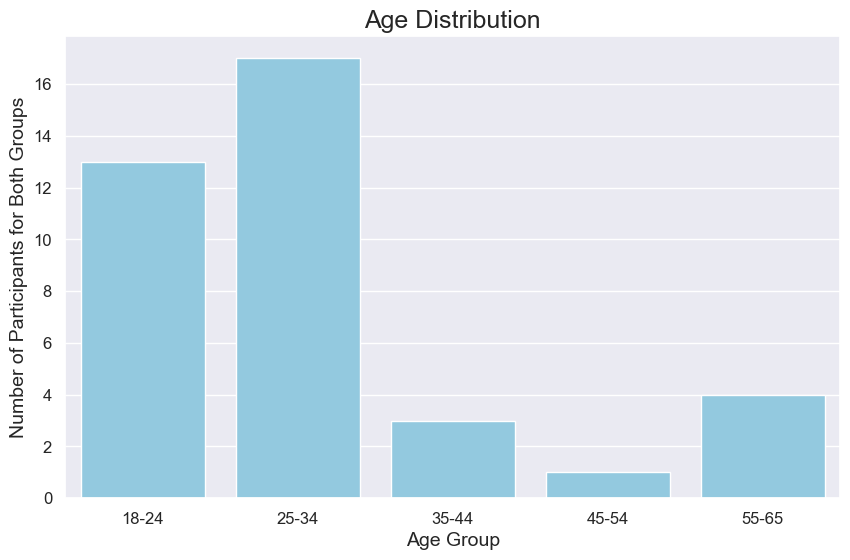

In [160]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-65']
df_combined['age'] = pd.Categorical(df_combined['age'], categories=age_order, ordered=True)
plt.figure(figsize=(10,6))
sns.countplot(x='age', data=df_combined, order=age_order, color='skyblue')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants for Both Groups', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

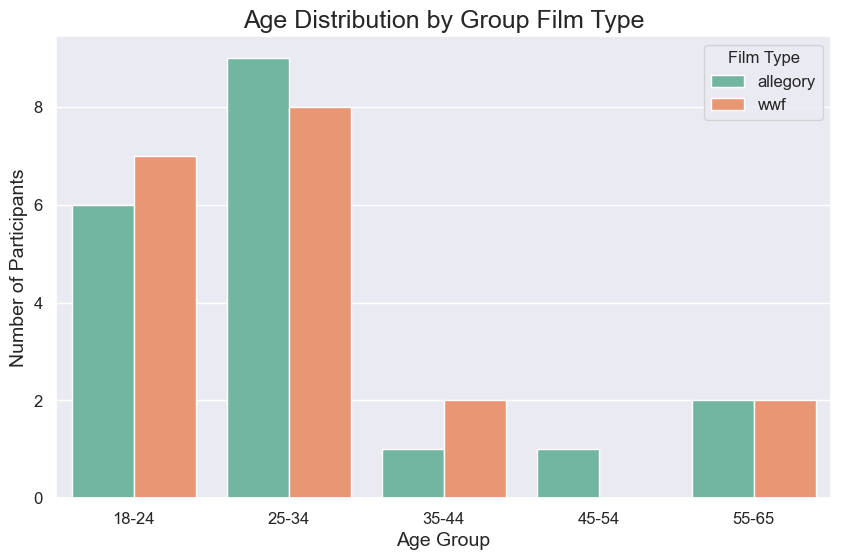

In [161]:
plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='film_type', data=df_combined, order=age_order, palette='Set2')
plt.title('Age Distribution by Group Film Type', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Film Type', fontsize=12)

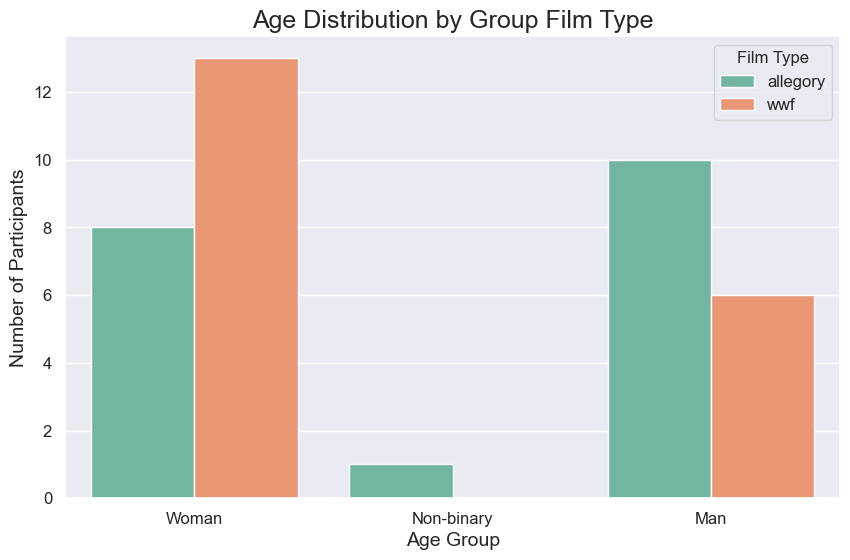

In [162]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='film_type', data=df_combined, palette='Set2')
plt.title('Age Distribution by Group Film Type', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Film Type', fontsize=12)

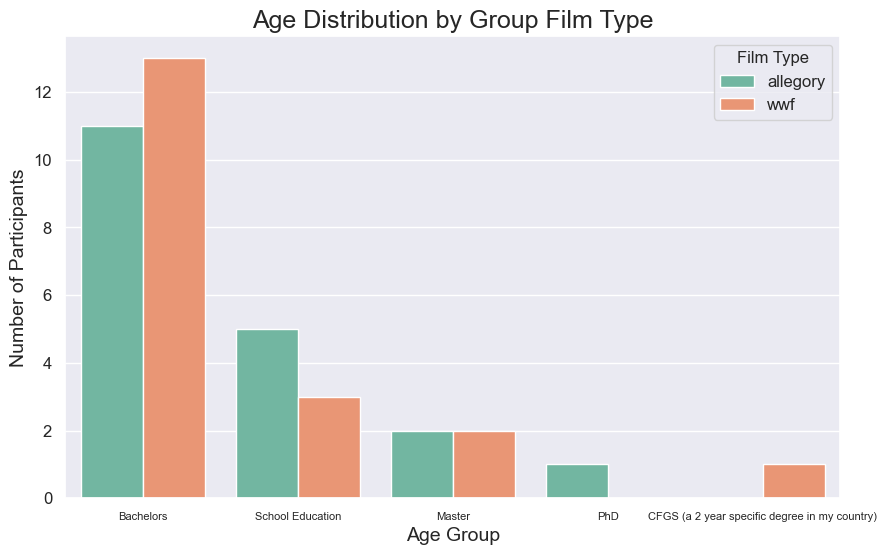

In [163]:
plt.figure(figsize=(10,6))
sns.countplot(x='education_level', hue='film_type', data=df_combined, palette='Set2')
plt.title('Age Distribution by Group Film Type', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.legend(title='Film Type', fontsize=12)

# NRS Analysis 

In [164]:
nrs_total = df_combined.groupby('film_type')['NRS_total'].agg(['mean', 'std'])
nrs_subscales = df_combined.groupby('film_type')[['NRS_self', 'NRS_perspective', 'NRS_experience', 'NR6']].agg(['mean', 'std'])
nrs_total

,mean,std
film_type,,
allegory,4.022556,0.548566
wwf,4.100251,0.388450


In [165]:
nrs_subscales

NRS_self           NRS_perspective           NRS_experience  \
               mean       std            mean       std           mean   
film_type                                                                
allegory   3.960526  0.764958        4.030075  0.630982       4.096491   
wwf        4.118421  0.559752        4.150376  0.472542       4.017544   

                          NR6            
                std      mean       std  
film_type                                
allegory   0.478926  3.877193  0.771487  
wwf        0.487165  3.964912  0.649261

In [166]:
# not expecting much in here since this is just the baseline across groups prior to the intervention, 
# but I do it for 'good practice'. 
t_stat, p_value = ttest_ind(allegory_group['NRS_total'], wwf_group['NRS_total'], equal_var=False)
print(f"T-test for NRS_total: t={t_stat:.3f}, p={p_value:.3f}")

#and for the subscales 
for subscale in ['NRS_self', 'NRS_perspective', 'NRS_experience']:
    t_stat, p_value = ttest_ind(allegory_group[subscale], wwf_group[subscale], equal_var=False)
    print(f"T-test for {subscale}: t={t_stat:.3f}, p={p_value:.3f}")

T-test for NRS_total: t=-0.504, p=0.618
T-test for NRS_self: t=-0.726, p=0.473
T-test for NRS_perspective: t=-0.665, p=0.511
T-test for NRS_experience: t=0.504, p=0.618


The regular 

Surveys for the NR6 (only involving 6 of the questions from the original NRS) there is an average score range of ~3.0 to 3.5, with most participant scoring between ~2.2 to 4.3. (Nisbet, at al)

Nisbet, E. and J. Zelenski (2013). "The NR-6: a new brief measure of nature relatedness." Frontiers in Psychology 4(813).


keep writing abotu this 



# PANAS Analysis 

In [167]:
PANAS_total = df_combined.groupby('film_type')[['PA', 'NA']].agg(['mean', 'std'])
PANAS_total

PA                   NA          
                mean       std       mean       std
film_type                                          
allegory   25.894737  7.467669  21.157895  8.487004
wwf        25.947368  7.870294  29.052632  9.413192

In [168]:
#comparing both groups 
# PANAS Positive Affect
t_pa, p_pa = ttest_ind(allegory_group['PA'], wwf_group['PA'])
print(f'T-test for PA: t={t_pa:.3f}, p={p_pa:.3f}')

# PANAS Negative Affect
t_na, p_na = ttest_ind(allegory_group['NA'], wwf_group['NA'])
print(f'T-test for NA: t={t_na:.3f}, p={p_na:.3f}')

T-test for PA: t=-0.021, p=0.983
T-test for NA: t=-2.715, p=0.010


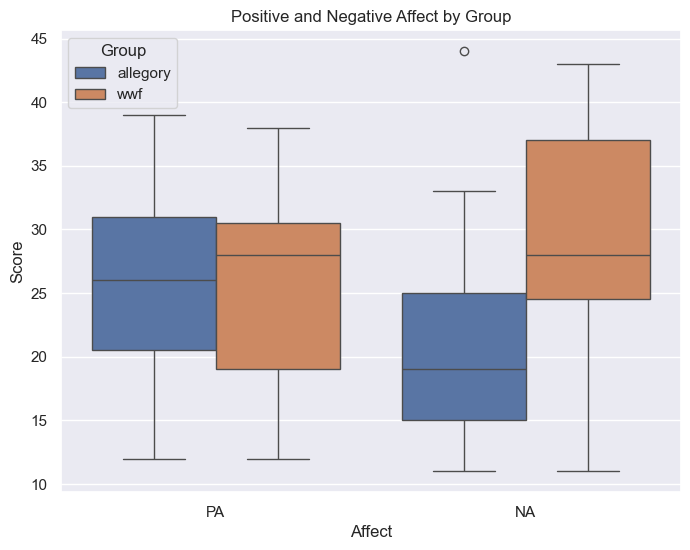

In [169]:
#looking at the data visually 
df_pa_na = df_combined.melt(id_vars=['film_type'], value_vars=['PA', 'NA'], var_name='Affect', value_name='Score')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_pa_na, x='Affect', y='Score', hue='film_type')
plt.title('Positive and Negative Affect by Group')
plt.ylabel('Score')
plt.legend(title='Group')
plt.show()

/var/folders/qx/yftthjpx27z_yv57wmqzt8440000gn/T/ipykernel_63762/1626708615.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x='Emotion', y='Score', hue='film_type', ci='sd')


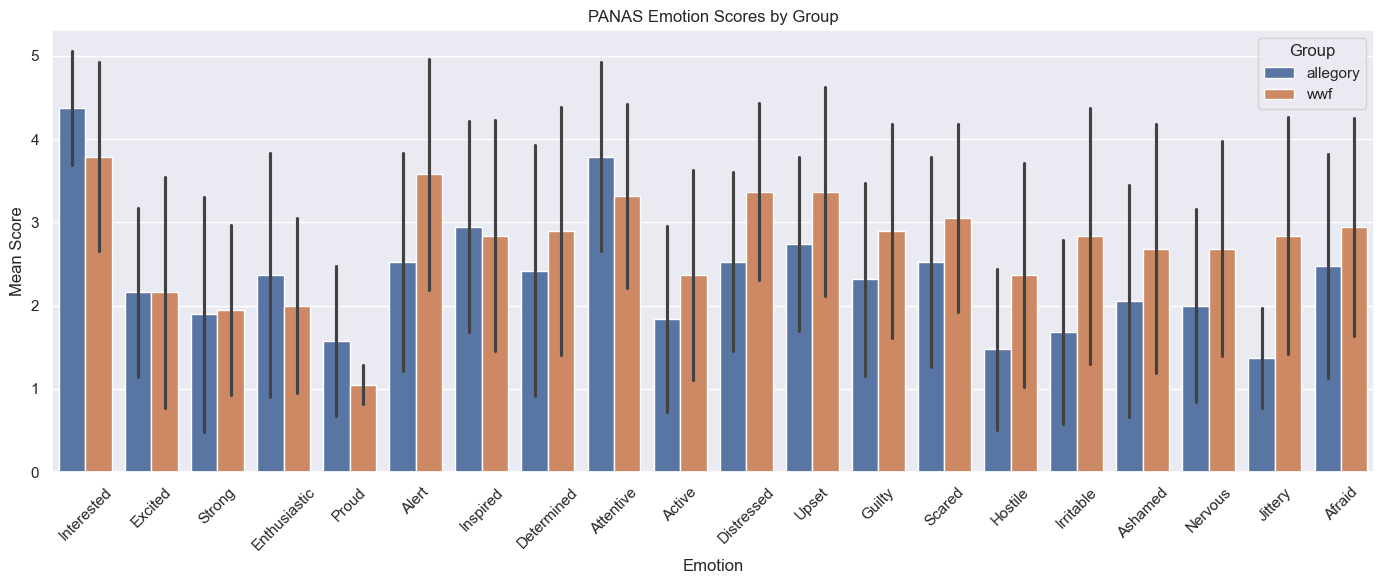

In [170]:
df_melted = df_combined.melt(id_vars=['film_type'], value_vars=df_combined[positive_affect + negative_affect], var_name='Emotion', value_name='Score')
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Emotion', y='Score', hue='film_type', ci='sd')
plt.xticks(rotation=45)
plt.title('PANAS Emotion Scores by Group')
plt.ylabel('Mean Score')
plt.legend(title='Group')
plt.tight_layout()

/var/folders/qx/yftthjpx27z_yv57wmqzt8440000gn/T/ipykernel_63762/399512521.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted_pa, x='Emotion', y='Score', hue='film_type', ci='sd')


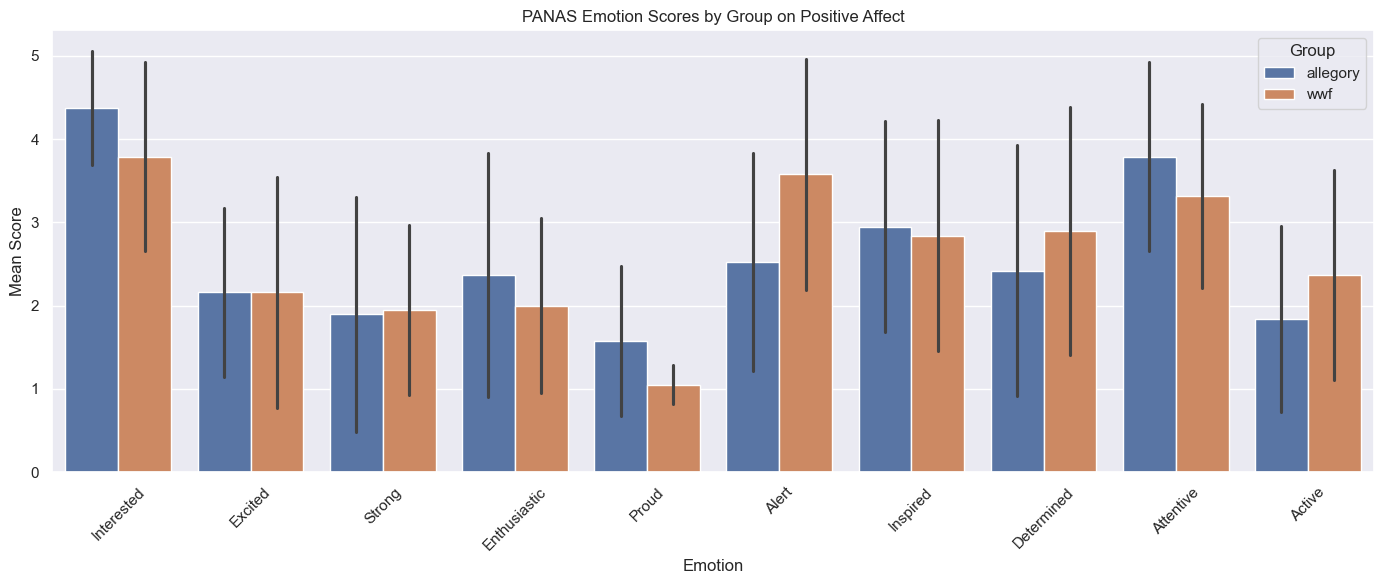

In [171]:
df_melted_pa = df_combined.melt(id_vars=['film_type'], value_vars=df_combined[positive_affect], var_name='Emotion', value_name='Score')
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted_pa, x='Emotion', y='Score', hue='film_type', ci='sd')
plt.xticks(rotation=45)
plt.title('PANAS Emotion Scores by Group on Positive Affect')
plt.ylabel('Mean Score')
plt.legend(title='Group')
plt.tight_layout()

/var/folders/qx/yftthjpx27z_yv57wmqzt8440000gn/T/ipykernel_63762/1867505456.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted_na, x='Emotion', y='Score', hue='film_type', ci='sd')


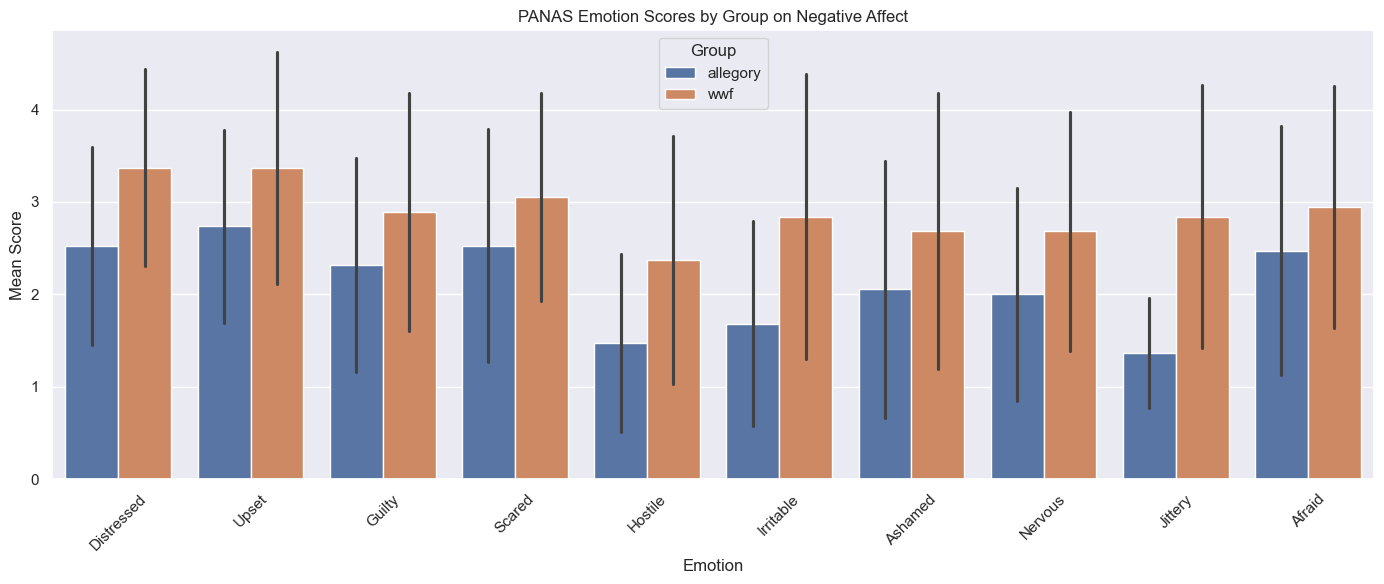

In [172]:
df_melted_na = df_combined.melt(id_vars=['film_type'], value_vars=df_combined[negative_affect], var_name='Emotion', value_name='Score')
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted_na, x='Emotion', y='Score', hue='film_type', ci='sd')
plt.xticks(rotation=45)
plt.title('PANAS Emotion Scores by Group on Negative Affect')
plt.ylabel('Mean Score')
plt.legend(title='Group')
plt.tight_layout()

In [173]:
# Cohen coefficient for effect size
allegory_PA = allegory_group['PA']
wwf_PA = wwf_group['PA']

allegory_NA = allegory_group['NA']
wwf_NA = wwf_group['NA']

def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / (nx + ny - 2))
    d = (np.mean(x) - np.mean(y)) / pooled_std
    return d

d_PA = cohens_d(allegory_PA, wwf_PA)
d_NA = cohens_d(allegory_NA, wwf_NA)

print(f"Cohen's d for PA: {d_PA:.3f}")
print(f"Cohen's d for NA: {d_NA:.3f}")

Cohen's d for PA: -0.007
Cohen's d for NA: -0.881


#### Correlation between NRS and PANAS 

In [174]:
#Spearman correlation between NRS_total and P, both groups:
stats.spearmanr(df_combined['NRS_total'], df_combined['PA'])

SignificanceResult(statistic=0.37779850746268656, pvalue=0.019360197803253765)

In [175]:
#Spearman correlation between NRS_total and NA, both groups:
stats.spearmanr(df_combined['NRS_total'], df_combined['NA'])

SignificanceResult(statistic=0.4446821676042321, pvalue=0.005154713878755246)

In [176]:
stats.spearmanr(wwf_group['NRS_total'], wwf_group['PA'])

SignificanceResult(statistic=0.35903083700440536, pvalue=0.131147411252386)

In [177]:
stats.spearmanr(wwf_group['NRS_total'], wwf_group['NA'])

SignificanceResult(statistic=0.18325991189427315, pvalue=0.45266711320464803)

In [178]:
stats.spearmanr(allegory_group['NRS_total'], allegory_group['PA'])

SignificanceResult(statistic=0.3894279173719182, pvalue=0.09934230932365958)

In [179]:
stats.spearmanr(allegory_group['NRS_total'], allegory_group['NA'])

SignificanceResult(statistic=0.6998242595338767, pvalue=0.000851243504249174)

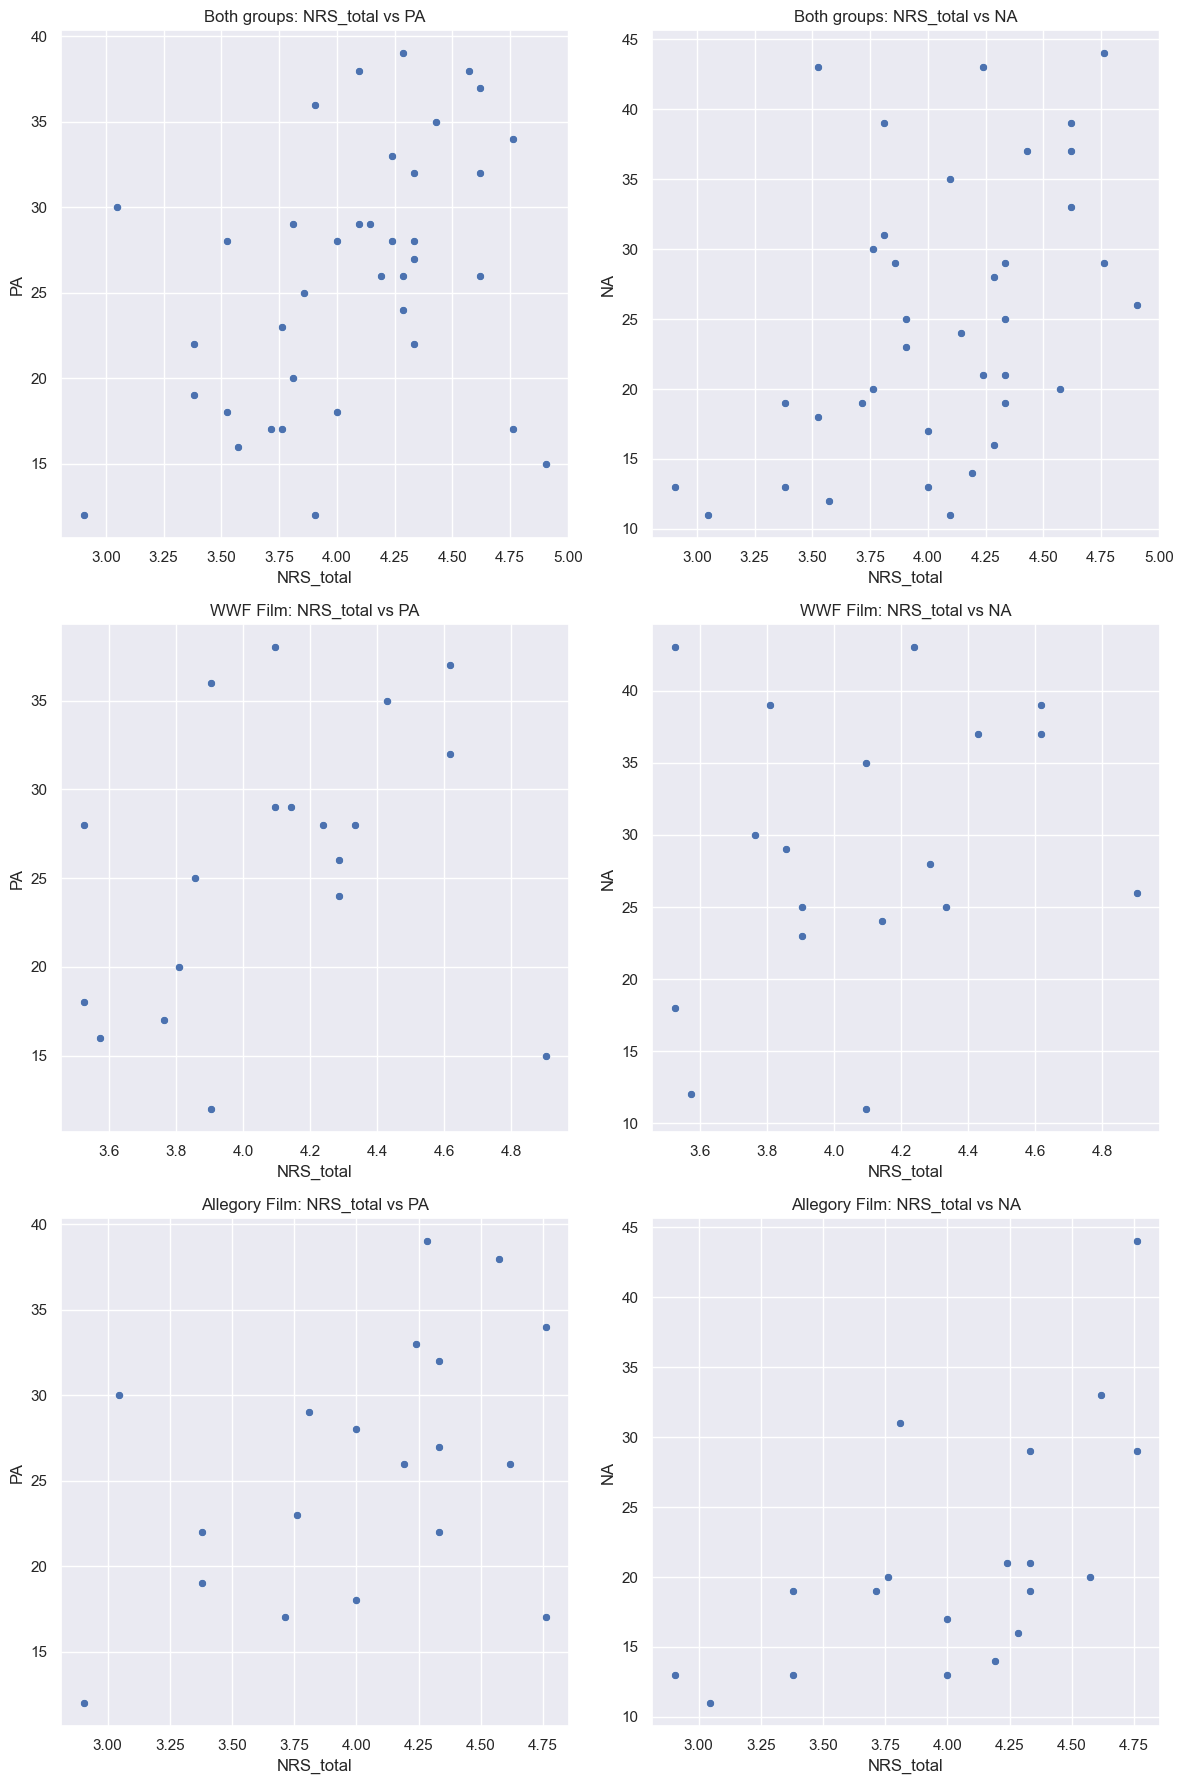

In [180]:
#plotting all the graphs from the findings above to be able to compare the clearly
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

sns.scatterplot(data=df_combined, x='NRS_total', y='PA', ax=axes[0, 0])
axes[0, 0].set_title('Both groups: NRS_total vs PA')

sns.scatterplot(data=df_combined, x='NRS_total', y='NA', ax=axes[0, 1])
axes[0, 1].set_title('Both groups: NRS_total vs NA')

sns.scatterplot(data=wwf_group, x='NRS_total', y='PA', ax=axes[1, 0])
axes[1, 0].set_title('WWF Film: NRS_total vs PA')

sns.scatterplot(data=wwf_group, x='NRS_total', y='NA', ax=axes[1, 1])
axes[1, 1].set_title('WWF Film: NRS_total vs NA')

sns.scatterplot(data=allegory_group, x='NRS_total', y='PA', ax=axes[2, 0])
axes[2, 0].set_title('Allegory Film: NRS_total vs PA')

sns.scatterplot(data=allegory_group, x='NRS_total', y='NA', ax=axes[2, 1])
axes[2, 1].set_title('Allegory Film: NRS_total vs NA')

plt.tight_layout()
plt.show()

In [181]:
df_combined['film_binary'] = df_combined['film_type'].map({'allegory': 0, 'wwf': 1})

# Predict film_type based on NRS scores
X = df_combined[['NA']]
X = sm.add_constant(X)
y = df_combined['film_binary']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.602365
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            film_binary   No. Observations:                   38
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.1310
Time:                        22:14:59   Log-Likelihood:                -22.890
converged:                       True   LL-Null:                       -26.340
Covariance Type:            nonrobust   LLR p-value:                  0.008622
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4588      1.083     -2.271      0.023      -4.581      -0.337
NA             0.0988      0.

# Narrative Survey Analysis 

In [182]:
narrative_total = df_combined.groupby('film_type')[['composite_narrative', 'composite_behavioral_intent', 'composite_emotional_impact']].agg(['mean', 'std'])
narrative_total

composite_narrative           composite_behavioral_intent            \
                         mean       std                        mean       std   
film_type                                                                       
allegory             4.342105  0.635799                    3.657895  1.131035   
wwf                  3.907895  0.894468                    3.157895  1.190852   

          composite_emotional_impact            
                                mean       std  
film_type                                       
allegory                    3.684211  0.919431  
wwf                         3.421053  1.313943

<Axes: xlabel='film_type', ylabel='film_understanding'>

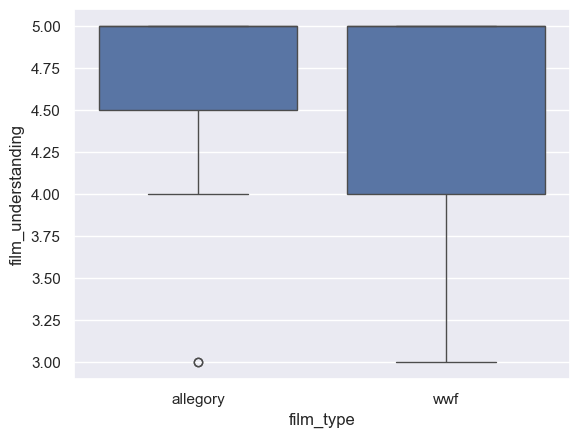

In [183]:
sns.boxplot(x='film_type', y='film_understanding', data=df_combined)


<Axes: xlabel='film_type', ylabel='cognitive_effort'>

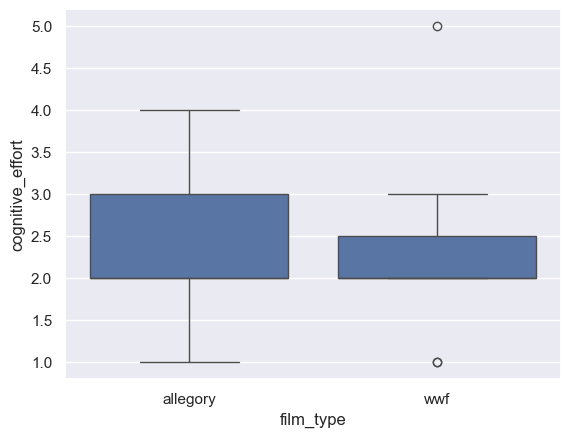

In [186]:
sns.boxplot(x='film_type', y='cognitive_effort', data=df_combined)


<Axes: xlabel='film_type', ylabel='eval_social_sharing'>

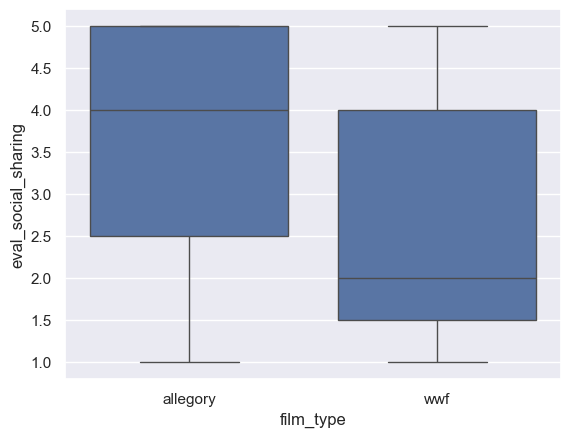

In [187]:
sns.boxplot(x='film_type', y='eval_social_sharing', data=df_combined)

In [189]:
#pca on the whole dataset
fa = FactorAnalysis(n_components=3).fit(df_combined[narrative_items + emotional_items + action_items])
print(pd.DataFrame(fa.components_, columns=narrative_items + emotional_items + action_items))


   eval_understanding  eval_interest  eval_attention  eval_narration_quality  \
0           -0.140240      -0.768321       -0.788349               -0.988352   
1            0.052550      -0.160825       -0.433531               -0.701335   
2            0.079516       0.028113        0.148587               -0.194561   

   eval_emotional_impact  eval_personal_affect  eval_personal_urgency  \
0              -1.213639             -0.805721              -0.986974   
1              -0.199043              0.267443               0.520519   
2               0.217681              0.443816               0.107010   

   eval_environmental_concern  eval_social_sharing  
0                   -0.815721            -1.131441  
1                    0.616625            -0.070311  
2                   -0.220741            -0.434078  


In [192]:
# Run PCA for each
pca_allegory = PCA(n_components=3).fit(allegory_group[items])
pca_wwf = PCA(n_components=3).fit(wwf_group[items])
# Show loadings
print("Allegory PCA:\n", pd.DataFrame(pca_allegory.components_, columns=items))
print("\nWWF PCA:\n", pd.DataFrame(pca_wwf.components_, columns=items))

Allegory PCA:
    eval_emotional_impact  eval_personal_affect  eval_personal_urgency  \
0               0.365867              0.317126               0.421501   
1               0.131770              0.111223              -0.341568   
2              -0.324738             -0.328404              -0.192844   

   eval_action_urgency  eval_environmental_concern  eval_social_sharing  \
0             0.251857                    0.359713             0.452386   
1            -0.114997                   -0.520797            -0.083122   
2            -0.218887                   -0.031091             0.813491   

   eval_understanding  eval_interest  eval_attention  eval_narration_quality  
0            0.074455       0.200510        0.216396                0.312819  
1            0.033197       0.189861        0.342045                0.638819  
2           -0.103953      -0.063005       -0.083357                0.130911  

WWF PCA:
    eval_emotional_impact  eval_personal_affect  eval_personal_ur